##### NoteBook Imports and Packages

In [59]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #Color Map

from sympy import symbols,diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

#### Example 1 = Simple Cost Function

$f(x) = x^2 + x + 1$

In [4]:
def f(x):
    return x**2 + x + 1

In [5]:
# Make Data
X_1 = np.linspace(start=-3,stop=3, num=500)

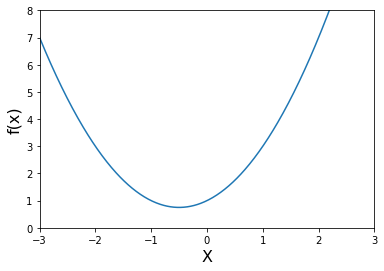

In [6]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1))
plt.show()

#### Slope and Derivatives

In [7]:
def df(x):
    return 2*x + 1 

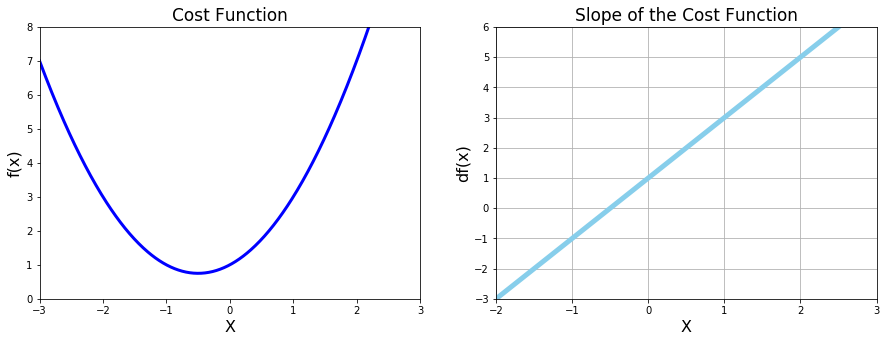

In [8]:
# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1), color='blue',linewidth=3)

plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=5)
plt.show()

#### Python Loops & Gradient Descent

In [9]:
# Gradient Descent - 1
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    stepsize = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if stepsize < precision:
        print(n)
        break

print('Occurs at', new_x)
print(df(new_x))
print(f(new_x))

40
Occurs at -0.49962781616118024
0.0007443676776395236
0.7500001385208099


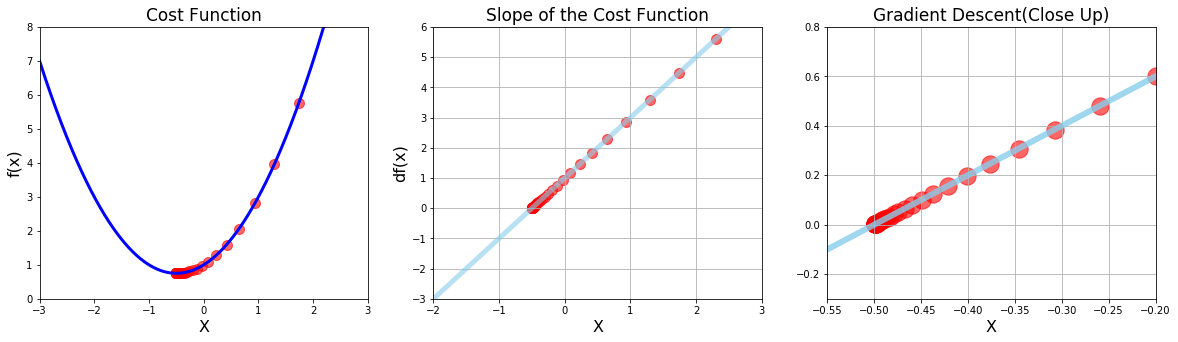

In [10]:
# Scatter Plot Subplot Function Side by Side
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(X_1, f(X_1), color='blue',linewidth=3)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

plt.subplot(1,3,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=5, alpha=0.6)
values = np.array(x_list)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.subplot(1,3,3)

plt.title('Gradient Descent(Close Up)', fontsize=17)
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.plot(X_1,df(X_1), color='skyblue',linewidth=6, alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)
plt.show()

#### Multiple Minima vs Inital Guess & Advanced Functions

#### $g(x) = x^4-4x^2+5$

In [11]:
# Make Some Data
X_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4-4*x**2 + 5

def dg(x):
    return 4*x**3-8*x

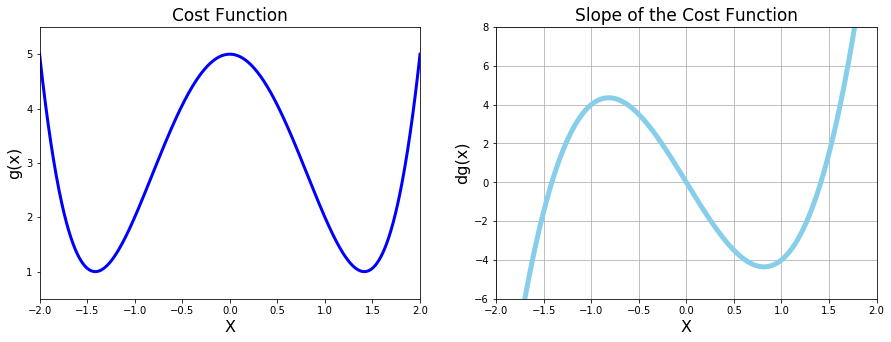

In [12]:
# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3)

plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.show()

#### Gradient Descent as a Python Function

In [13]:
# Gradient Descent -2

def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.0001, max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        stepsize = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if stepsize < precision:
            break
    
    return new_x,x_list,slope_list

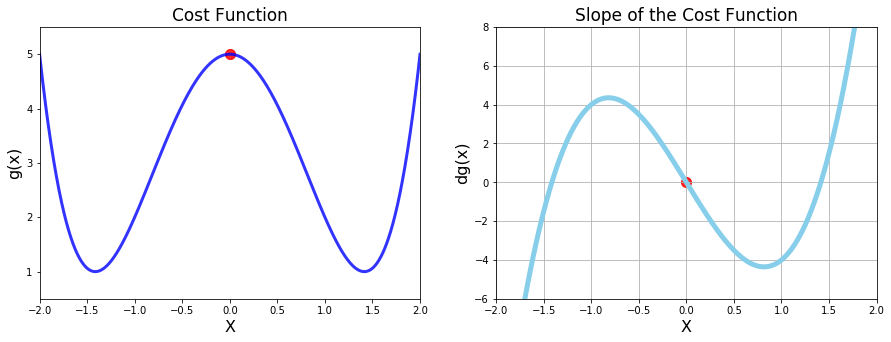

In [14]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess=0)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red',s=100,alpha=0.6)
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

#### Example 3 - Divergence Overflow and Python Tuples

#### $h(x) = x^5 - 2x^4 + 2$

In [15]:
#Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

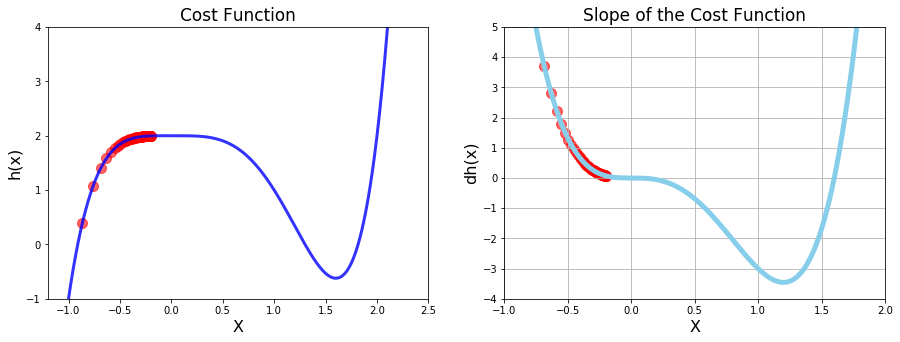

Local Min occurs at:  -2071072.4470816324
Cost at this Minimum is:  -3.810455326061589e+31
Number of Steps:  71


In [16]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=70)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)), color='red',s=100,alpha=0.6)
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3,dh(x_3), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Local Min occurs at: ', local_min)
print('Cost at this Minimum is: ', h(local_min))
print('Number of Steps: ', len(list_x))

In [17]:
import sys
sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

#### Python Tuples

In [18]:
# Creating a Tuple - Tuple Packing
# Example
breakfast = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13, 4, 9, 26, 17

# Accessing Tuples
print('I Love', breakfast[0])

# Differentiating Factor of Tuples - Having Hetrogenous Data
not_my = 1, 'two', 3, 'Four'

# Tuple with Single Value
one_value = 1,
type(one_value)

# Sequence Packing
main, side, greens = breakfast
print(main)

# Gradient Descent Tuple
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print(data_tuple[0])

I Love bacon
bacon
1.5998724702484226


#### The Learning Rate

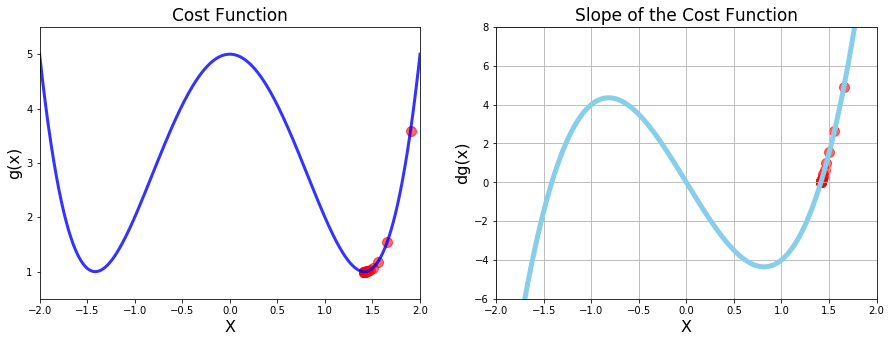

Number of Steps 20


In [19]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess=1.9,multiplier=0.02, max_iter=500)

# Subplot Function Side by Side
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(X_2, g(X_2), color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red',s=100,alpha=0.6)

plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(X_2,dg(X_2), color='skyblue',linewidth=5)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Number of Steps', len(list_x))


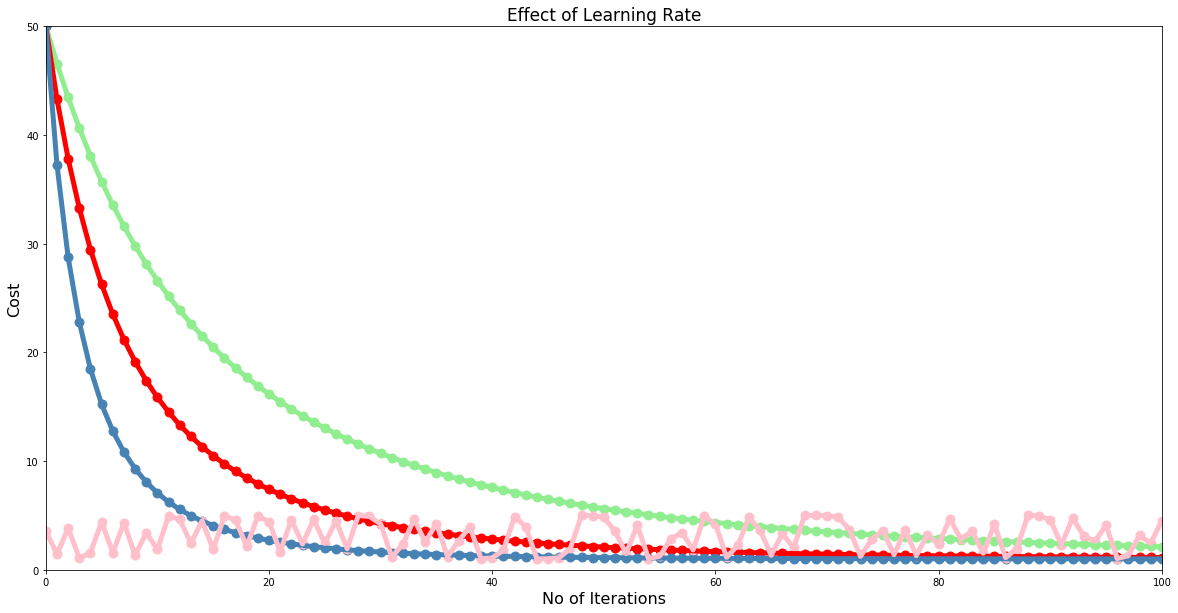

In [20]:
# Run Gradient Descent 3 Times
n = 100
# Gamma is often used for Learning Rate
low_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier=0.002, precision=0.0001, max_iter=n)

# Experiments
insane_gamma = gradient_descent(derivative_func=dg,initial_guess=1.9,multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting Reduction in Cost for Each iteration
plt.figure(figsize=[20,10])

plt.title('Effect of Learning Rate', fontsize=17)
plt.xlim([0,n])
plt.ylim([0,50])
plt.xlabel('No of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our Chart
# 1) Y Axis Data: Convert List to Numpy Arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: Create List from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting Low Learning Rate
plt.plot(iteration_list, g(low_values), color='lightgreen',linewidth=5)
plt.scatter(iteration_list,g(low_values), color='lightgreen',s=80)

# # Plotting Mid Learning Rate
plt.plot(iteration_list, g(mid_values), color='red',linewidth=5)
plt.scatter(iteration_list,g(mid_values), color='red',s=80)

# Plotting High Learning Rate
plt.plot(iteration_list, g(high_values), color='steelblue',linewidth=5)
plt.scatter(iteration_list,g(high_values), color='steelblue',s=80)

# Plotting Experiment Learning Rate
plt.plot(iteration_list, g(insane_values), color='pink',linewidth=5)
plt.scatter(iteration_list,g(insane_values), color='pink',s=80)


plt.show()

#### Example 4 - Data Visualisation with 3D Charts

#### Minmise $f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$

#### Splitting Minimise $f(x,y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$ 

In [21]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [22]:
# Make Data
x_4 = np.linspace(start = -2 , stop = 2, num = 200)
y_4 = np.linspace(start = -2 , stop = 2, num = 200)
print(x_4.shape)
x_4, y_4 = np.meshgrid(x_4, y_4)
print(x_4.shape)

(200,)
(200, 200)


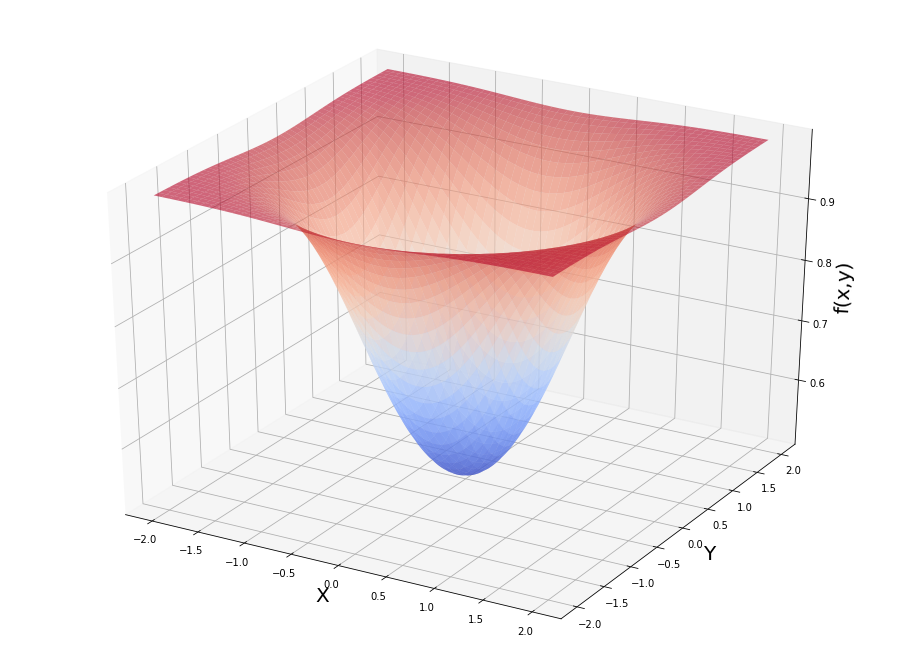

In [23]:
# Generating 3D Plot

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
plt.show()

For Calculating Slope of above 3d Function we Have to Use Partial Derivatives 
We will use Symbolic Computation in Python

#### Partial Derivatives and Symbolic Computation
#### Using SymPy

### Function $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$

### Function $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$

In [24]:
a,b = symbols('x , y')
print('Our Cost Function is',f(a, b))

f(a,b)

print('Partial Derivative Function is ',diff(f(a,b), a))
diff(f(a,b), a)
print('Value of F(x,y) at x=1.8 and y=1',f(a,b).evalf(subs={a: 1.8, b: 1.0})) # This type of Function is Python Dictionary
print('Value of Partial Derivative of f(x,y) at x=1.8 and y=1.0',diff(f(a,b),a).evalf(subs={a: 1.8, b:1.0}))

Our Cost Function is 1/(3**(-x**2 - y**2) + 1)
Partial Derivative Function is  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of F(x,y) at x=1.8 and y=1 0.990604794032582
Value of Partial Derivative of f(x,y) at x=1.8 and y=1.0 0.0368089716197505


#### Batch Gradient Descent with SymPy

In [25]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

Values in Gradient Array [2.01013037525579e-11 1.11673909736433e-11]
Minimum Occurs at: X - 3.45838599885832e-11
Minimum Occurs at: y - 1.92132555492129e-11
The Cost is 0.500000000000000


In [26]:
# Partial Derivative as Python Function

def fpx(x,y):
    r = 3**(-x**2-y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x,y):
    r = 3**(-x**2-y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [27]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5


#### Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [28]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))

(1, 2)
Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5


In [29]:
# Advanced Numpy Array Practise

# One Row Two Columnns
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

# Two Rows Two Columns
hs_band = np.array([['Black Thought', 'MC'],['QuestLove', 'Drums']])
print(hs_band.shape)

# Selecting from 2d Arrays
print('hs_band[0][1] = ',hs_band[0][1])

# Appending to 2d Arrays
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

#Slicing Arrays
print('Printing Nickname....', the_roots[:, 0])
the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)

print('Print Band Roles....', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0][1] =  MC
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Printing Nickname.... ['Black Thought' 'QuestLove' 'Captain']
Print Band Roles.... ['MC' 'Drums' 'Guitar' 'MC']


In [30]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
# Results
print('Values in Gradient Array', gradients)
print('Minimum Occurs at: X -',params[0])
print('Minimum Occurs at: y -',params[1])
print('The Cost is', f(params[0], params[1]))
print(len(values_array))

(1, 2)
Values in Gradient Array [2.01013038e-11 1.11673910e-11]
Minimum Occurs at: X - 3.458385998858304e-11
Minimum Occurs at: y - 1.9213255549212797e-11
The Cost is 0.5
501


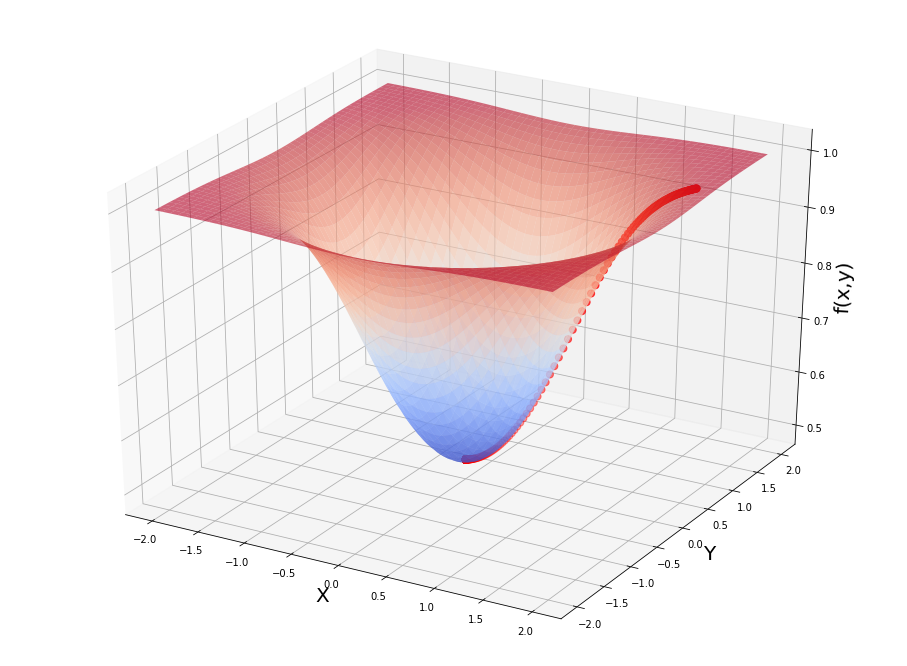

In [31]:
# Generating 3D Plot with x and y Values

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s=50, color='red')
plt.show()

#### Example 5: Working with Data and Real Cost Function

#### Mean Squared Error Method - A Cost Function for Regression Problems

### $RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $
### $MSE = \frac{1}{n}  \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $
### $MSE = \frac{1}{n}  \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $

In [41]:
# Make Sample Data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5: ',x_5.shape)
print('Shape of y_5: ',y_5.shape)

Shape of x_5:  (7, 1)
Shape of y_5:  (7, 1)


In [43]:
# Quick Linear Regression

regr = LinearRegression()
regr.fit(x_5, y_5)
print("Theta 0:", regr.intercept_[0])
print("Theta 1:", regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


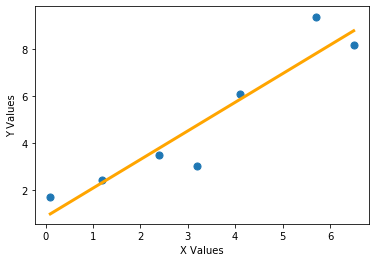

In [46]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color="orange", linewidth=3)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [52]:
# Y_Hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print("Estimated Values Y_hat: \n",y_hat)
print("In Comparison, the Actual y Values are \n", y_5)

Estimated Values Y_hat: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In Comparison, the Actual y Values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [55]:
# MSE Function in python

def mse(y, y_hat):
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [61]:
print("Manually Calculated MSE is",mse(y_5, y_hat))
print("MSE Regression using Manual Calc is", mean_squared_error(y_5, y_hat))
print("MSE Regression is", mean_squared_error(y_5, regr.predict(x_5)))

Manually Calculated MSE is [0.94796558]
MSE Regression using Manual Calc is 0.9479655759794577
MSE Regression is 0.9479655759794577


#### 3D Plot for the MSE Function

#### Make Data for Thetas

In [82]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

#### Calc MSE using Nested Loops

In [70]:
# Nested Loops Example
for i in range(3):
    for j in range(3):
        print(f"Value of i and j is {i} and {j}")
        

Value of i and j is 0 and 0
Value of i and j is 0 and 1
Value of i and j is 0 and 2
Value of i and j is 1 and 0
Value of i and j is 1 and 1
Value of i and j is 1 and 2
Value of i and j is 2 and 0
Value of i and j is 2 and 1
Value of i and j is 2 and 2


In [83]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print("Shape of Plot_t0 is ",plot_t0.shape)
print("Shape of Plot_t1 is ",plot_t1.shape)
print("Shape of Plot_cost is ",plot_cost.shape)

Shape of Plot_t0 is  (200, 200)
Shape of Plot_t1 is  (200, 200)
Shape of Plot_cost is  (200, 200)


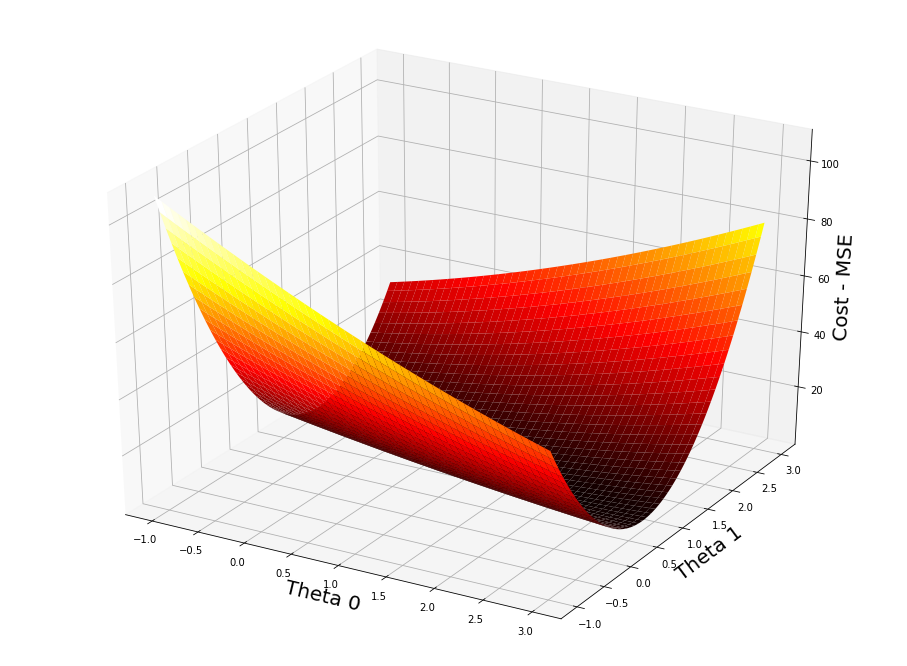

In [85]:
# Plotting Mean Squared Error
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [92]:
print("Min Value of plot_cost is ",plot_cost.min())
# ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape())
print("Min MSE for Theta0 at [111][91]", plot_t0[111][91])
print("Min MSE for Theta1 at [111][91]", plot_t1[111][91])

Min Value of plot_cost is  0.9483826526747164
Min MSE for Theta0 at [111][91] 0.829145728643216
Min MSE for Theta1 at [111][91] 1.2311557788944723


### Partial Derivatives of MSE w.r.t  $\theta_0$ and $\theta_1$

### $\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $
### $\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $

#### MSE and Gradient Descent

In [96]:
# X Values, y Values, array of theta Parameters (theta 0 at index 0 and theta 1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n)*sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n)*sum((y - thetas[0] - thetas[1]*x)*x)
    #return  np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [98]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect Data Points for Plotting
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the New Values to the Vals
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
#Results
print('The Min Occurs at Theta0: ',thetas[0])
print('The Min Occurs at Theta1: ',thetas[1])
print('MSE is: ',mse(y_5, thetas[0] + thetas[1]*x_5))

The Min Occurs at Theta0:  0.8532230461743415
The Min Occurs at Theta1:  1.2214935332607393
MSE is:  [0.94797511]


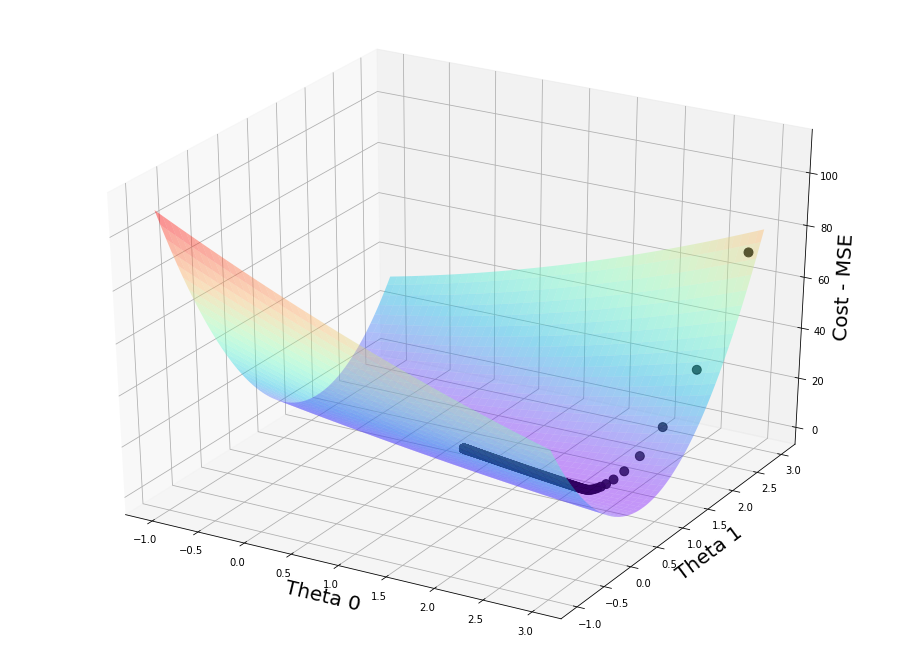

In [102]:
# Plotting Mean Squared Error
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color="black")
plt.show()